In [71]:
import numpy as np
from skimage import io
import tensorflow as tf
import matplotlib.pyplot as plt
# CLASS IMPORTS
from YOLO import Yolo

In [72]:
is_qantized = False
COCOCLASSES = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
        'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
        'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
        'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
        'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
        'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
        'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
        'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
        'hair drier', 'toothbrush']

In [73]:
def transform(URL, img_size = 640, int8 = False):
    int_type = np.int8 if int8 else np.float32
    img = io.imread(URL)
    im = tf.image.resize(img, (img_size, img_size))
    im = np.expand_dims(im, axis=0).astype(int_type)/255.0
    return img, im

In [74]:
url = "https://images.unsplash.com/photo-1556911073-52527ac43761?crop=entropy&cs=tinysrgb&fit=max&fm=jpg&ixid=MnwyMTYyOTB8MHwxfHNlYXJjaHwyODV8fGtpdGNoZW58ZW58MHx8fHwxNjUxOTQ2NTcx&ixlib=rb-1.2.1&q=80&w=400"

In [75]:
def urlRoute():

    URL = url
    int8 = is_qantized
    img, im = transform(URL, img_size= 640)

    MODEL_PATH = "tflite_models\yolov5s-fp16.tflite"
    YOLO = Yolo(model_path = MODEL_PATH, CLASSES = COCOCLASSES, int8 = int8)

    H = img.shape[0]
    W = img.shape[1]
    YOLO.pred(im)

    YOLO.extract_results()
    YOLO.return_bbox(score_threshold = 0.45)
    data = YOLO.return_results(H, W)

    del YOLO

    return data, img

In [76]:
data, img = urlRoute()
data

{'class_names': ['bowl', 'bowl', 'person', 'bowl', 'orange', 'potted plant'],
 'class_scores': [81, 80, 68, 58, 54, 51],
 'coordinates': [[2, 189, 113, 241],
  [0, 240, 49, 266],
  [144, 45, 297, 191],
  [115, 200, 150, 223],
  [281, 214, 301, 233],
  [270, 8, 396, 170]],
 'final': [[[2, 189, 113, 241], 81, 'bowl'],
  [[0, 240, 49, 266], 80, 'bowl'],
  [[144, 45, 297, 191], 68, 'person'],
  [[115, 200, 150, 223], 58, 'bowl'],
  [[281, 214, 301, 233], 54, 'orange'],
  [[270, 8, 396, 170], 51, 'potted plant']]}

In [77]:
def show_results(img, data):
    for [coordinates, score, class_name] in data["final"]:
        coordinates = [int(x) for x in coordinates]
        xmin, ymin, xmax, ymax = coordinates
        text = f"{class_name} : {score}%"
        cv2.rectangle(img, (int(xmin),int(ymin)), (int(xmax),int(ymax)), (225, 100, 0), 1)
        cv2.putText(img, text, (int(xmin), int(ymin)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    plt.imshow(img)
    plt.show()

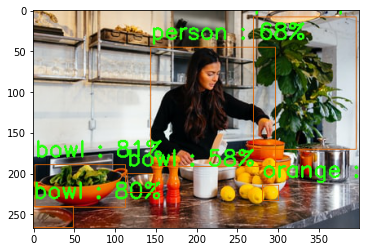

In [78]:
show_results(img, data)